## **Proyecto 3**

_Mario De León_

_Pablo Escobar_

_Jorge Caballeros Pérez_

----

#### Elección de la imagen.

Se seleccionó una imagen la cual sería ideal como muestra panorámica, inicialmente se dividirá la imagen en partes y se rotará para tomar el efecto deseado en una vez sea procesada. El output deseado debería ser lo más parecido a la imagen original en la medida de lo posible.

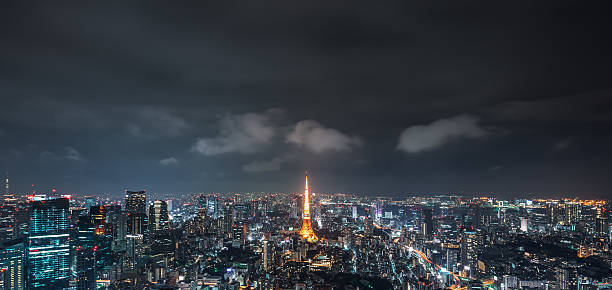

### División de la imagen

In [2]:
# import cv2

# def rotate_image(image, angle):
#     # Centro de rotación: el centro de la imagen
#     height, width = image.shape[:2]
#     center = (width // 2, height // 2)

#     # Matriz de rotación
#     matrix = cv2.getRotationMatrix2D(center, angle, 1.0)

#     # Realizar la rotación
#     rotated_image = cv2.warpAffine(image, matrix, (width, height))
#     return rotated_image

# # Cargar la imagen
# image = cv2.imread('./images/original.jpg')

# # Obtener las dimensiones de la imagen
# height, width, _ = image.shape

# # Calcular el ancho de cada parte (división vertical)
# part_width = width // 3

# # Crear las tres partes verticales y rotar cada una
# part1 = image[:, 0:part_width]
# part1_rotated = rotate_image(part1, 3)  # Rotar 15 grados

# part2 = image[:, part_width:2*part_width]
# part2_rotated = rotate_image(part2, -3)  # Rotar -10 grados (rotación inversa)

# part3 = image[:, 2*part_width:width]
# part3_rotated = rotate_image(part3, -2)  # Rotar 5 grados

# # Guardar las partes rotadas
# cv2.imwrite('./images/parte1.jpg', part1_rotated)
# cv2.imwrite('./images/parte2.jpg', part2_rotated)
# cv2.imwrite('./images/parte3.jpg', part3_rotated)


In [3]:
import cv2
import numpy as np

# Función para cargar una imagen y detectar puntos de interés con SIFT
def detect_features(image_path):
    # Cargar imagen
    image = cv2.imread(image_path)
    if image is None:
        print("Error: No se pudo cargar la imagen.")
        return None, None

    # Convertir a escala de grises
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Inicializar SIFT
    sift = cv2.SIFT_create()

    # Detectar puntos de interés y calcular descriptores
    keypoints, descriptors = sift.detectAndCompute(gray_image, None)

    # Opcional: Dibujar los puntos de interés en la imagen para guardarla o analizarla posteriormente
    image_with_keypoints = cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
    cv2.imwrite('keypoints3.jpg', image_with_keypoints)  # Guardar la imagen con keypoints

    return keypoints, descriptors


keypoints1, descriptors1 = detect_features('./images/parte1.jpg')
keypoints2, descriptors2 = detect_features('./images/parte2.jpg')
keypoints3, descriptors3 = detect_features('./images/parte3.jpg')


### Matching de Puntos de Interés

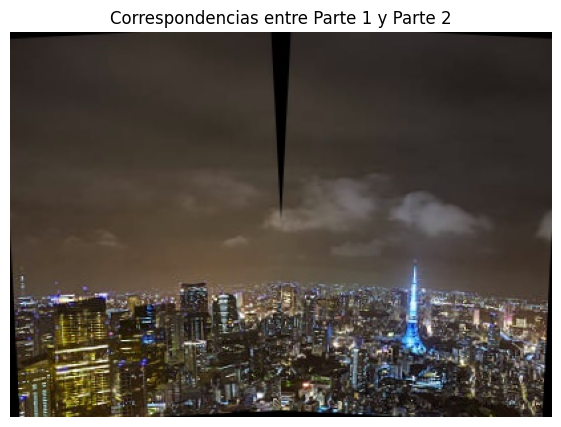

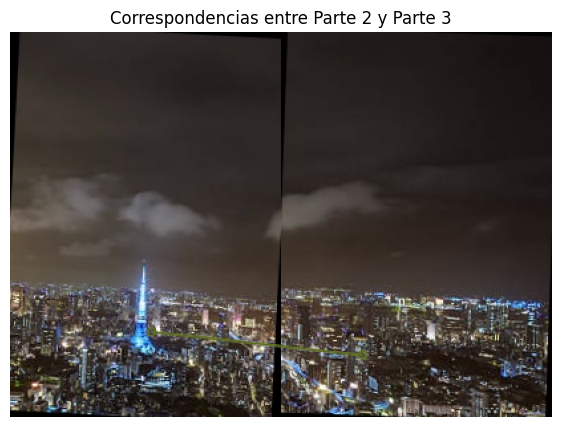

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def detect_features(image_path):
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Cargar imagen directamente en escala de grises
    if image is None:
        print("Error: No se pudo cargar la imagen.")
        return None, None
    sift = cv2.SIFT_create()  # Inicializar SIFT
    keypoints, descriptors = sift.detectAndCompute(image, None)
    return keypoints, descriptors

def match_features(descriptors1, descriptors2):
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(descriptors1, descriptors2, k=2)
    good_matches = []
    # Aplicar el test de Lowe para filtrar los matches
    for m, n in matches:
        if m.distance < 0.75 * n.distance:
            good_matches.append(m)
    return good_matches

def draw_matches(image1, keypoints1, image2, keypoints2, matches, title="Correspondencias"):
    # Dibujar los matches
    result_image = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches, None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    # Convertir BGR a RGB
    result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
    # Usar matplotlib para mostrar la imagen
    plt.figure(figsize=(10, 5))
    plt.imshow(result_image)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Rutas a las imágenes
paths = ['images/parte1.jpg', 'images/parte2.jpg', 'images/parte3.jpg']
keypoints = []
descriptors = []

# Detectar características para cada imagen
for path in paths:
    kp, desc = detect_features(path)
    keypoints.append(kp)
    descriptors.append(desc)

# Realizar matching entre las imágenes consecutivas
matches12 = match_features(descriptors[0], descriptors[1])
matches23 = match_features(descriptors[1], descriptors[2])

# Cargar imágenes originales para visualización
images = [cv2.cvtColor(cv2.imread(path), cv2.COLOR_BGR2RGB) for path in paths]

# Visualizar los matches
draw_matches(images[0], keypoints[0], images[1], keypoints[1], matches12, "Correspondencias entre Parte 1 y Parte 2")
draw_matches(images[1], keypoints[1], images[2], keypoints[2], matches23, "Correspondencias entre Parte 2 y Parte 3")
